In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras import layers

from keras import losses, optimizers, metrics

C:\Users\bikas\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'data\\train'
test_dir ='data\\test'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=8
)

Found 4651 images belonging to 7 classes.
Found 247 images belonging to 7 classes.


# Try using pretrined model

In [3]:
from keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet',
                 include_top=True,
                 input_shape=(224, 224, 3))

# conv_base.summary()

In [4]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Dense(7, activation='softmax'))
model.summary()

conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(lr=5e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=146, 
                              epochs=15, 
                              validation_data=validation_generator, 
                              validation_steps=31)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1000)              25636712  
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 7007      
Total params: 25,643,719
Trainable params: 25,590,599
Non-trainable params: 53,120
_________________________________________________________________
This is the number of trainable weights before freezing the conv base: 2
Epoch 1/15
146/146 [==============================] - 34s 233ms/step - loss: 1.9458 - categorical_accuracy: 0.1513 - val_loss: 1.9459 - val_categorical_accuracy: 0.1579
Epoch 2/15
146/146 [==============================] - 30s 205ms/step - loss: 1.9456 - categorical_accuracy: 0.1605 - val_loss: 1.9459 - val_categorical_accuracy: 0.1579
Epoch 3/15
146/146 [==============================] - 31s 210ms/step - loss: 1.9455 - categorical_accuracy: 0.

Epoch 1/200
146/146 [==============================] - 40s 272ms/step - loss: 1.9368 - categorical_accuracy: 0.2994 - val_loss: 1.9182 - val_categorical_accuracy: 0.3563
Epoch 2/200
146/146 [==============================] - 34s 234ms/step - loss: 1.9127 - categorical_accuracy: 0.4577 - val_loss: 1.9031 - val_categorical_accuracy: 0.3806
Epoch 3/200
146/146 [==============================] - 34s 235ms/step - loss: 1.8940 - categorical_accuracy: 0.5002 - val_loss: 1.8877 - val_categorical_accuracy: 0.4615
Epoch 4/200
146/146 [==============================] - 34s 235ms/step - loss: 1.8812 - categorical_accuracy: 0.5260 - val_loss: 1.8802 - val_categorical_accuracy: 0.4818
Epoch 5/200
146/146 [==============================] - 34s 235ms/step - loss: 1.8735 - categorical_accuracy: 0.5493 - val_loss: 1.8769 - val_categorical_accuracy: 0.5142
Epoch 6/200
146/146 [==============================] - 34s 235ms/step - loss: 1.8680 - categorical_accuracy: 0.5706 - val_loss: 1.8707 - val_categoric

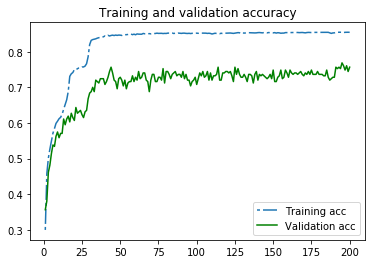

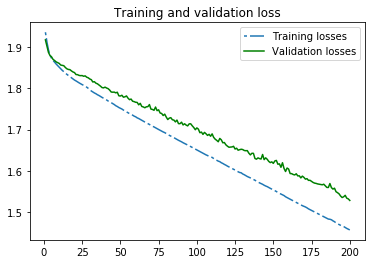

In [5]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'res5a_branch2a':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        

model.compile(
    optimizer=optimizers.Adam(lr=1e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=146, 
                              epochs=200, 
                              validation_data=validation_generator, 
                              validation_steps=31)

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Epoch 1/10
146/146 [==============================] - 40s 271ms/step - loss: 1.4542 - categorical_accuracy: 0.8553 - val_loss: 1.5225 - val_categorical_accuracy: 0.7571
Epoch 2/10
146/146 [==============================] - 34s 235ms/step - loss: 1.4523 - categorical_accuracy: 0.8551 - val_loss: 1.5200 - val_categorical_accuracy: 0.7652
Epoch 3/10
146/146 [==============================] - 34s 236ms/step - loss: 1.4515 - categorical_accuracy: 0.8540 - val_loss: 1.5243 - val_categorical_accuracy: 0.7530
Epoch 4/10
146/146 [==============================] - 34s 236ms/step - loss: 1.4491 - categorical_accuracy: 0.8553 - val_loss: 1.5122 - val_categorical_accuracy: 0.7692
Epoch 5/10
146/146 [==============================] - 34s 236ms/step - loss: 1.4474 - categorical_accuracy: 0.8547 - val_loss: 1.5186 - val_categorical_accuracy: 0.7490
Epoch 6/10
146/146 [==============================] - 35s 237ms/step - loss: 1.4465 - categorical_accuracy: 0.8528 - val_loss: 1.5163 - val_categorical_acc

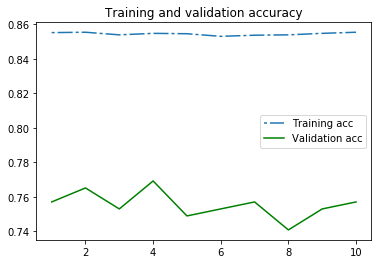

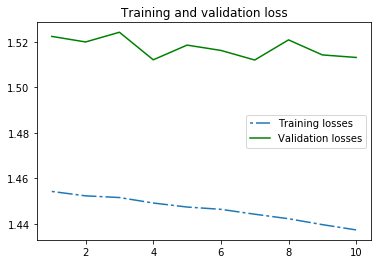

In [6]:
conv_base.trainable = True

model.compile(
    optimizer=optimizers.Adam(lr=1e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=146, 
                              epochs=10, 
                              validation_data=validation_generator, 
                              validation_steps=31)

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()